# Read ASCII File
This jupyter notebook demonstrates usage of the `GoesAsciiFile` class to read and plot data from legacy ascii files.

First, import some libraries.

In [1]:
import goeset
import matplotlib.pyplot as plt

Next, create the `GoesAsciiFile` object and print out it's help documents to see what it does and some example usage.

In [2]:
etf = goeset.GoesAsciiFile(r'data\sample_data.txt')
help(etf)

Help on GoesAsciiFile in module goeset.goeset object:

class GoesAsciiFile(builtins.object)
 |  GoesAsciiFile(fpth)
 |  
 |  A thin wrapper around the Pandas DataFrame class to help read
 |  and manipulate legacy ASCII files.
 |  
 |  Attributes
 |  ----------
 |  
 |  Methods
 |  -------
 |  
 |  Examples
 |  --------
 |  >>> import goeset
 |  >>> etfile = goeset.GoesAsciiFile('Florida_2017.txt')
 |  >>> eto = etfile.get_array('RET')
 |  
 |  >>> import goeset
 |  >>> etfile  = goeset.GoesAsciiFile('Florida_2017.txt')
 |  >>> df = etfile.get_dataframe(nrows=500)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, fpth)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  get_array(self, param, flush=False)
 |      Get data stored in the ASCII file as a numpy.maskedarray.
 |      
 |      Parameters
 |      ----------
 |      param : str
 |          Name of the parameter for which data will be returned
 |      flush : bool
 |          If true, reload fresh

## Get Pandas.DataFrame
Use the `get_dataframe()` method to read the ascii file and return a `Pandas.DataFrame` object.

In [3]:
df = etf.get_dataframe()
df

,YYYYMMDD,Lat,Lon,NRpix,RET,PET,RS,Albedo,Tmin,Tmax,Rhmin,Rhmax,Ws
0,2019-01-01,24.554,-82.113,8390,3.727,3.348,15.43,0.048,20.076,27.221,55.519,97.906,5.813
1,2019-01-01,24.554,-81.807,8406,3.818,3.031,16.31,0.136,20.087,27.639,55.490,98.441,5.718
2,2019-01-01,24.554,-81.788,8407,3.801,3.077,16.06,0.121,20.085,27.662,55.505,98.455,5.716
3,2019-01-01,24.572,-82.094,8865,3.794,3.556,16.37,0.047,20.051,27.245,55.405,97.972,5.774
4,2019-01-01,24.572,-81.749,8883,3.821,3.315,16.29,0.089,20.052,27.716,55.434,98.504,5.683
...,...,...,...,...,...,...,...,...,...,...,...,...,...
391745,2019-01-10,30.985,-85.096,177926,1.368,1.260,15.11,0.087,-0.917,10.292,49.247,87.628,2.939
391746,2019-01-10,30.985,-85.076,177927,1.346,1.233,14.86,0.089,-0.893,10.222,49.818,87.120,2.964
391747,2019-01-10,30.985,-85.057,177928,1.338,1.307,14.85,0.068,-0.872,10.153,50.414,86.672,2.987
391748,2019-01-10,30.985,-85.038,177929,1.328,1.322,14.77,0.062,-0.853,10.086,51.029,86.288,3.008


## Plot Data
Example of how to plot data stored in the file. First, plot a timeseries of data for Pixel ID 8390:

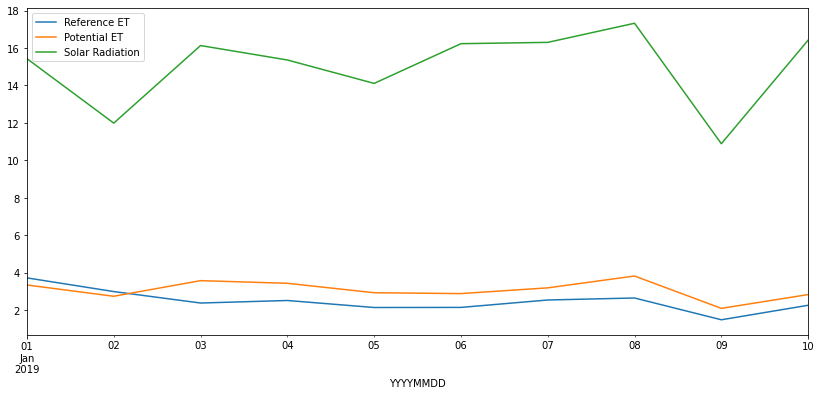

In [4]:
# Get data for pixel 8390
pixel_id = 8390
pxdata = df.set_index(['NRpix'])
pxdata = pxdata.loc[pixel_id]

# Set the DataFrame index on the date column
# so we can get nice timestamps on the x-axis of our plot
pxdata = pxdata.set_index(['YYYYMMDD'])

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(111)

pxdata['RET'].plot(ax=ax, label='Reference ET')
pxdata['PET'].plot(ax=ax, label='Potential ET')
pxdata['RS'].plot(ax=ax, label='Solar Radiation')

plt.legend()
plt.show()

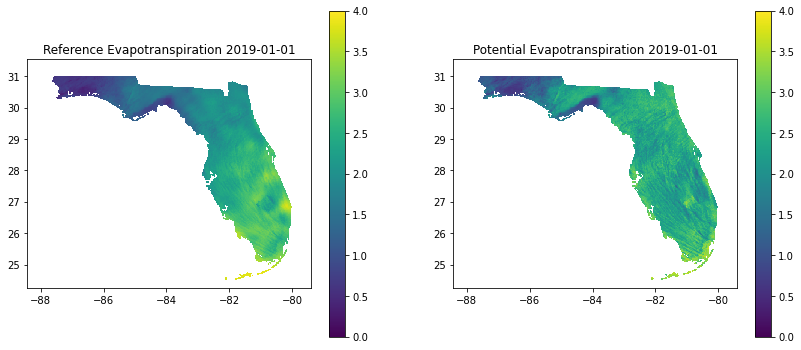

In [5]:
fig = plt.figure(figsize=(14, 6))

iday = 0


# Reference ET
ax = fig.add_subplot(121, aspect='equal')
dt = etf.dates[iday]
dtstr = dt.strftime('%Y-%m-%d')
ax.set_title(f'Reference Evapotranspiration {dtstr}')

# Get the latitude/longitude values
x, y = etf.longitude, etf.latitude

# Get the data values
array = etf.get_array('RET')

# Plot it
quadmesh = ax.pcolormesh(x, y, array[iday], vmin=0, vmax=4)
cb = plt.colorbar(quadmesh)


# Potential ET
ax = fig.add_subplot(122, aspect='equal')
dt = etf.dates[iday]
dtstr = dt.strftime('%Y-%m-%d')
ax.set_title(f'Potential Evapotranspiration {dtstr}')

# Get the latitude/longitude values
x, y = etf.longitude, etf.latitude

# Get the data values
array = etf.get_array('PET')

# Plot it
quadmesh = ax.pcolormesh(x, y, array[iday], vmin=0, vmax=4)
cb = plt.colorbar(quadmesh)


plt.show()